In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
auseir = pd.read_csv('data/ausair.csv', index_col=0)

In [ ]:
def HoltLinearTrend(vals, alpha, beta, h):
    forecast = [vals[0]]
    level = vals[0]
    trend = vals[1] - vals[0]

    for t in range(1, len(vals) + h):
        forecast.append(level + trend)

        if t < len(vals):
            value = vals[t]
        else:
            value = forecast[-1]

        pred_level = level
        pred_trend = trend
        level = alpha * value + (1 - alpha) * (pred_level + pred_trend)
        trend = beta * (level - pred_level) + (1 - beta) *  pred_trend
        
    return forecast

In [4]:
vals = auseir['Passengers'].values
alpha = 0.59
beta = 0.43
h = 10
forecast = HoltLinearTrend(vals, alpha, beta, h)

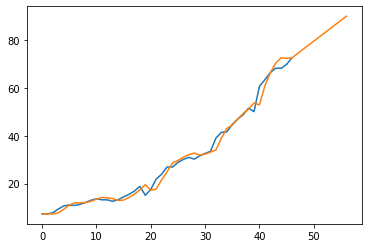

In [5]:
plt.plot(vals)
plt.plot(forecast)

In [6]:
def AdditiveDecayingTrend(vals, alpha, beta, h, phi):
    forecast = [vals[0], vals[0]]
    level = vals[0]
    trend = vals[1] - vals[0]

    for t in range(1, len(vals) + h):
        if t < len(vals):
            value = vals[t]
        else:
            value = forecast[-1]
        
        pred_level = level
        level = alpha * value + (1 - alpha) * (pred_level + phi * trend)
        trend = beta * (level - pred_level) + (1 - beta) * phi *  trend
        
        forecast.append(level + phi * trend)
        
    return forecast

In [7]:
vals = auseir['Passengers'].values
alpha = 0.39
beta = 0.1
phi = 0.9
h = 10
forecast = AdditiveDecayingTrend(vals, alpha, beta, h, phi)

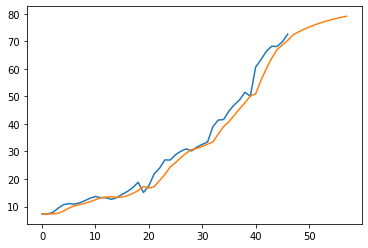

In [8]:
plt.plot(vals)
plt.plot(forecast)